World Bank API with Python 2.7
======

## Brazil and Chile FDI Example

-----

*September 3, 2017*<br>
*@bd_econ*

The World Bank API documentation can be found [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structure)

In [1]:
import requests
import pandas as pd

## Parameters/ Settings

In [2]:
base = 'http://api.worldbank.org/countries/'
countries = 'bra;chl'
ind = 'BX.KLT.DINV.WD.GD.ZS?MRV=25'
url = '{}{}/indicators/{}&format=json'.format(base, countries, ind)

## Request the data

In [3]:
r = requests.get(url).json()[1]

In [4]:
df = pd.DataFrame()
for x in r:
    df.set_value(
        pd.to_datetime(x['date']), 
        x['country']['value'], 
        round(float(x['value']),2))
title = x['indicator']['value']

C:\Users\BDew\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


## Plot the results

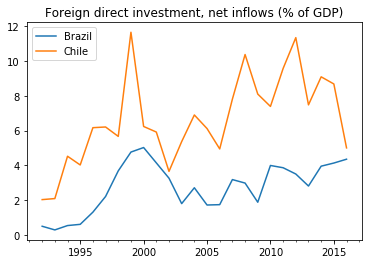

In [5]:
%matplotlib inline
df.sort_index().plot(title=title)